In [1]:
import pandas as pd
import warnings
athlete_data = pd.read_csv('Encoded_Data.csv') 

In [2]:
athlete_data.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,1,24.0,180.0,80.0,4975,5141,1992,0,12977,3280,0
1,1,23.0,170.0,60.0,4975,5141,2012,0,22426,341,0
2,1,24.0,175.0,70.0,3424,3570,1920,0,4292,5733,0
3,1,34.0,175.0,70.0,6,3570,1900,0,7169,170,1
4,0,21.0,185.0,82.0,5718,5839,1988,1,2639,467,0


Feature Selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

X = athlete_data.drop('Medal',axis=1)
Y = athlete_data[['Medal']]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0.5,0,'Random Forest Feature Importance')

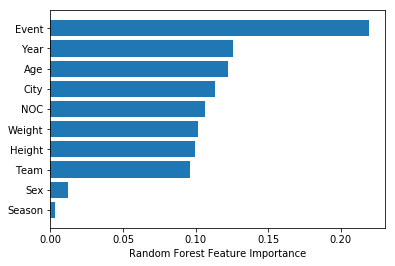

In [11]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
X_train.drop(['Sex','Season'],axis=1,inplace=True)

Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=pd.DataFrame(sc.fit_transform(X_train[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_train.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']
X_test=pd.DataFrame(sc.fit_transform(X_test[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_test.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']
X_train.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,Height,Weight,Team,NOC,Year,City,Event
0,-1.032211,-0.027728,-0.041925,0.126779,0.025742,-2.421256,0.948796,-0.306844
1,-0.237809,-0.027728,-0.041925,1.282511,1.262441,-0.080003,-1.223527,0.347905
2,-0.873331,-2.181158,-1.713138,0.717071,0.673748,0.655820,-1.229725,-0.869291
3,0.079951,-1.104443,-1.076485,-1.173605,-1.217189,-0.347574,-0.321385,1.515931
4,0.238832,-0.027728,-0.041925,-0.230285,-0.269007,-0.481360,-1.223527,-0.033385


Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
y_pred = rf.predict(X_test)

In [16]:
cm=confusion_matrix(Y_test, y_pred)

Text(42,0.5,'Truth')

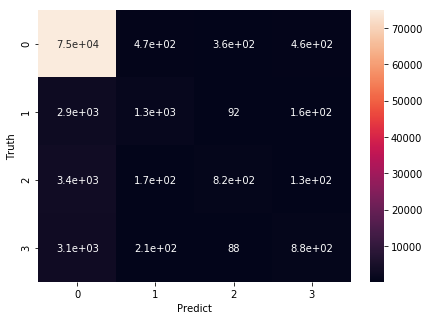

In [17]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     76272
           1       0.60      0.29      0.39      4403
           2       0.60      0.18      0.28      4486
           3       0.54      0.21      0.30      4308

   micro avg       0.87      0.87      0.87     89469
   macro avg       0.66      0.42      0.48     89469
weighted avg       0.84      0.87      0.84     89469



In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8713967966558249

* From the classification table we can see that the precision values ar highest at 0.89 for 0 (No medal) while the precision
values for people who won medals are significantly better compared to linear models such as logistic regression which gave 0 
as precision and recall values. 

* f1-score which is the harmonic mean of precision and recall is 0.94 for Random forestmodel for no medal category. Coming to averages we get 0.88 as weignted accuracy average. 

* Accuracy is highest among the different models tested which is 0.875. This is the accuracy value for Random forest model of 
entire dataset.
